In [4]:
# Import required libraries

import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
# importing data set
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Research/Method 3 - Abstract/abstracts.csv")
# observing
df.head()

,Abstract,Intervention Area
0,Abstract This fact sheet addresses cybersecuri...,AreaCybersecurity CybersecurityInterventions that
1,Abstract Maritime cybersecurity is developing ...,AreaCybersecurity CybersecurityInterventions that
2,Abstract While Cambodia has achieved stellar g...,AreaCybersecurity CybersecurityInterventions that
3,Abstract This guide was initially developed fo...,AreaCybersecurity CybersecurityInterventions that
4,Abstract The Global Cybersecurity Capacity Pro...,AreaCybersecurity CybersecurityInterventions that


In [64]:
# Function to remove 'Area' from each word
def remove_area(word):
    return word.replace("Area", "")

# Apply the function to each record in the 'Words' column
df['Intervention Area'] = df['Intervention Area'].apply(remove_area)

In [65]:
# Get unique values from the 'Intervention Area' column
unique_values = df['Intervention Area'].unique()
print(unique_values)

['Cybersecurity CybersecurityInterventions that' 'Digital finance Digital'
 'Digital inclusion Digital' 'Data systems and'
 'Digital information services'
 'Upskilling/Capacity Building Upskilling/Capacity'
 'Digital infrastructure development' 'Policy and regulation'
 'E-government E-governmentInterventions that' 'Digital literacy Digital'
 'Child Protection Child' 'Data privacy Data']


In [66]:
# Convert filecalss into int values
classes={'Child Protection Child':'Child Protection','Cybersecurity CybersecurityInterventions that':'Cybersecurity',
         'Data privacy Data':'Data Privacy','Data systems and':'Data Systems & Development',
         'Digital finance Digital':'Digital Finance','Digital inclusion Digital':'Digital Inclusion',
         'Digital information services':'Digital Information Services',
         'Digital infrastructure development':'Digital Infrastructure Development',
         'Digital literacy Digital':'Digital Literacy',
         'Policy and regulation':'Policy & Regulation or Digital Services',
         'E-government E-governmentInterventions that':'E-government',
         'Upskilling/Capacity Building Upskilling/Capacity':'Upskilling/ Capacity Building'
         }
# map the filecalss values
df['Intervention Area']=df['Intervention Area'].map(classes)

In [67]:
#Rename 
df = df.rename(columns={'Abstract': 'Title'})

In [68]:
# lowercasing
df["Title"] = df["Title"].str.lower()

In [69]:
# Remove punctuations
PUNCT_TO_REMOVE = string.punctuation.replace("'", "")

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["Title"] = df["Title"].apply(lambda text: remove_punctuation(text))

In [70]:
# remove numbers

def remove_numbers(text):
    number_pattern = re.compile(r'\d+')
    return number_pattern.sub(r'', text)

df["Title"] = df["Title"].apply(lambda text: remove_numbers(text))

In [71]:
# remove non alphabetic 
def remove_non_alpha(text):
    non_alpha_pattern = re.compile(r'[^a-zA-Z\s]')
    return non_alpha_pattern.sub(r'', text)

df["Title"] = df["Title"].apply(lambda text: remove_non_alpha(text))

In [72]:
# remove extra white space
def remove_extra_whitespaces(text):
    whitespace_pattern = re.compile(r'\s+')
    return whitespace_pattern.sub(' ', text)

df["Title"] = df["Title"].apply(lambda text: remove_extra_whitespaces(text))

In [73]:
# remove one letter word such as e a l
def remove_single_letter_words(text):
    return " ".join([word for word in str(text).split() if len(word) > 1])

df["Title"] = df["Title"].apply(lambda text: remove_single_letter_words(text))

In [74]:
# check if there are duplicates
df.duplicated(subset=['Title']).any() 

True

In [75]:
import plotly.express as px # plotly
from wordcloud import WordCloud # wordclouds
import matplotlib.pyplot as plt #matplot

In [76]:
# Count the number of items per group
group_counts = df.groupby("Intervention Area").count()
group_counts=group_counts.reset_index()

# Create the bar chart
fig = px.bar(group_counts, x='Intervention Area', y='Title',color="Intervention Area")

# Show the chart
fig.show()

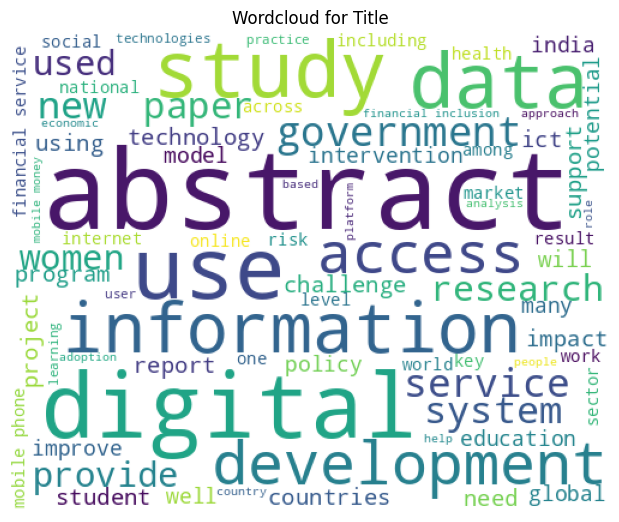

In [77]:
# word cloud to check the overall spread of words

all_words = '' 

# to extract most common words
for arg in df["Title"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Wordcloud for Title") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

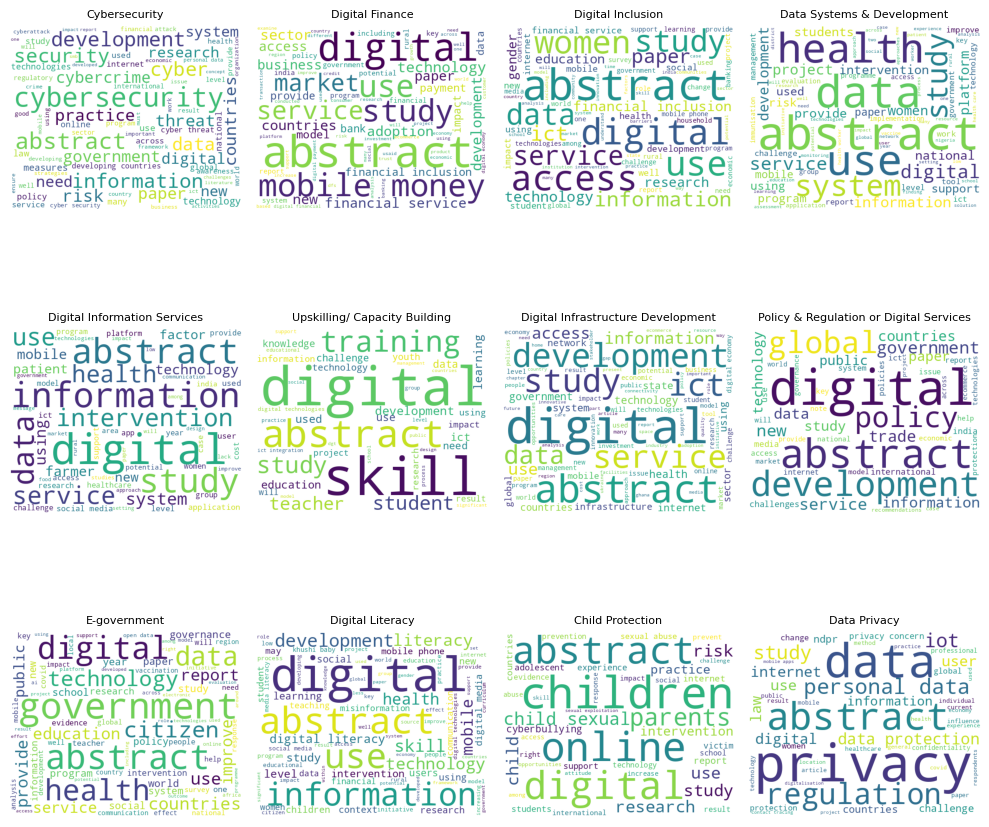

In [78]:
# word clouds based on intervention areas

# Get all the unique classes in the dataset
classes = df['Intervention Area'].unique()

# Create a figure with 4 subplots
fig, axs = plt.subplots(3, 4, figsize=(10, 10))
axs = axs.ravel()

# Iterate through each class
for i, class_name in enumerate(classes):
    # Get all the text for the current class
    class_text = df[df['Intervention Area'] == class_name]['Title'].str.cat(sep=' ')
    # Generate the wordcloud
    wordcloud = WordCloud(width = 500, height = 400, 
                background_color ='white', 
                #colormap="ocean",
                min_font_size = 10).generate(class_text) 
    # Plot the wordcloud
    axs[i].imshow(wordcloud) 
    axs[i].set_title(f"{class_name}",fontsize=8) 
    axs[i].axis("off") 
fig.tight_layout()
plt.show()

In [79]:
# preprocessing 

import re #Regular expressions
import nltk #NLP library
import spacy
import string
from bs4 import BeautifulSoup #HTML tags
from nltk.corpus import stopwords #english stopwords
#lematising
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [80]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
countries=['abstract','digital','development','intervention','technology']

In [82]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# Read in custom stopwords list from text file
with open('/content/drive/MyDrive/Colab Notebooks/Research/Stoplist.txt', 'r') as file:
    custom_stopwords = set(file.read().split())

# Add custom stopwords to the existing STOPWORDS set
STOPWORDS = STOPWORDS.union(custom_stopwords)

# Add the additional stopwords to the STOPWORDS set
STOPWORDS = STOPWORDS.union(countries)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in STOPWORDS])

df["Title"] = df["Title"].apply(lambda text: remove_stopwords(text))

In [83]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [84]:
# lemmatisation

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["Title"] = df["Title"].apply(lambda text: lemmatize_words(text))
df.head()

,Title,Intervention Area
0,fact sheet address cybersecurity distribute en...,Cybersecurity
1,maritime cybersecurity develop issue ocean sec...,Cybersecurity
2,cambodia achieve stellar growth poverty reduct...,Cybersecurity
3,guide initially develop regulator europe euras...,Cybersecurity
4,global cybersecurity capacity program generous...,Cybersecurity


In [85]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# Read in custom stopwords list from text file
with open('/content/drive/MyDrive/Colab Notebooks/Research/Stoplist.txt', 'r') as file:
    custom_stopwords = set(file.read().split())

# Add custom stopwords to the existing STOPWORDS set
STOPWORDS = STOPWORDS.union(custom_stopwords)

# Add the additional stopwords to the STOPWORDS set
STOPWORDS = STOPWORDS.union(countries)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in STOPWORDS])

df["Title"] = df["Title"].apply(lambda text: remove_stopwords(text))

In [86]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Research/preprocessed_abstract.csv",index=True)